In [1]:
%pylab nbagg
from tvb.simulator.lab import *

Populating the interactive namespace from numpy and matplotlib
   INFO  log level set to INFO


/nadata/cnl/home/yuchen/Documents/dCov_nonlinear/TVB/TVB_Distribution/tvb_data/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import savemat
from glob import glob

In [3]:
pwd

u'/nadata/cnl/home/yuchen/Documents/dCov_nonlinear/TVB/TVB_Distribution/demo_scripts'

# Simulation with the reduced Wong-Wang model

Gustavo et al and Hansen et al 2015 used the reduced Wong-Wang model to reproduce certain aspects of human resting state fMRI. This is a 1D model, so we can tune its parameters simply by plotting the derivative as a function of the state variable:

<IPython.core.display.Javascript object>


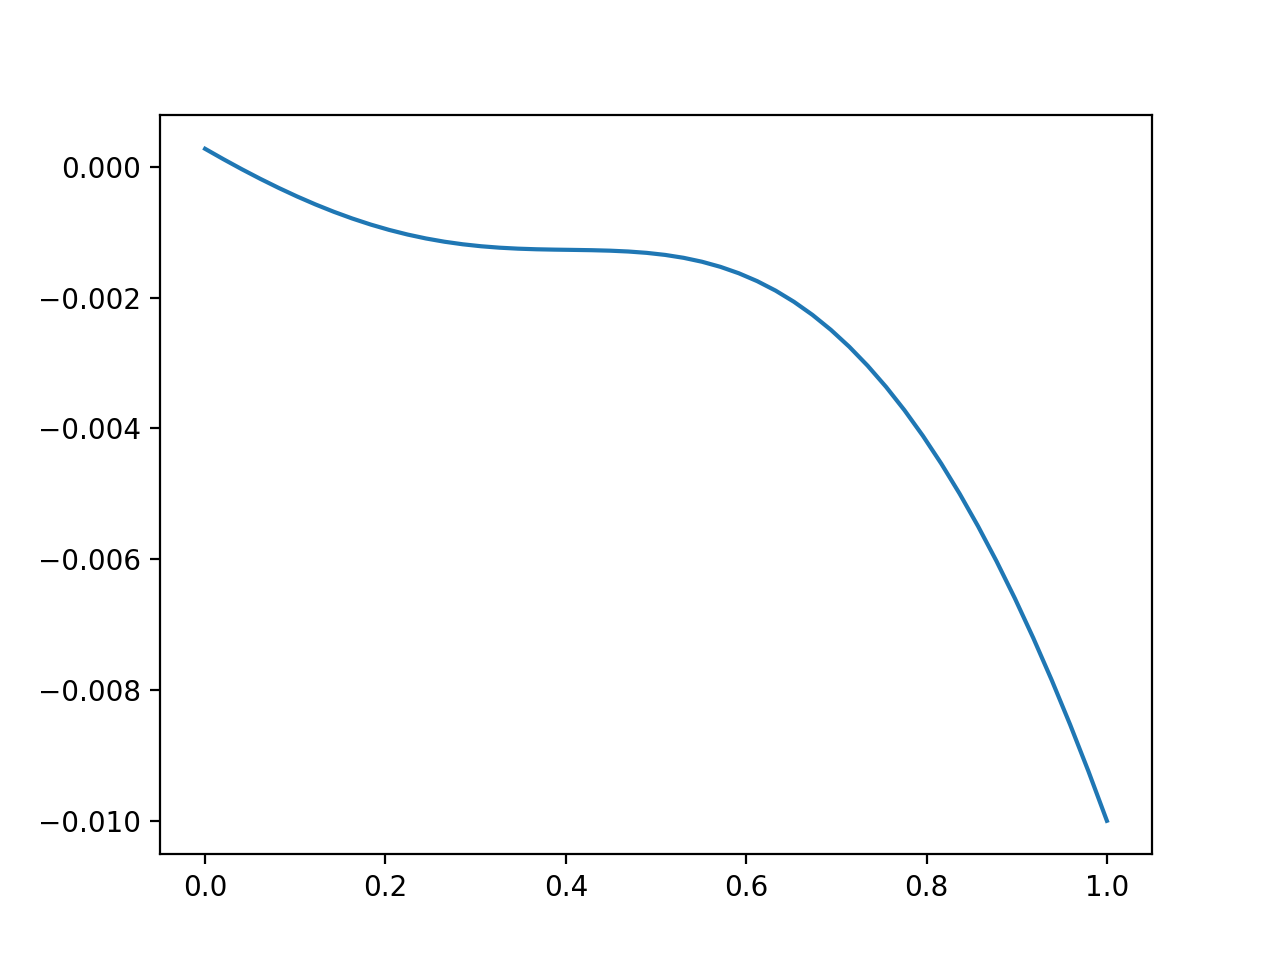

In [4]:
rww = models.ReducedWongWang(a=0.27, w=1.0, I_o=0.3)
S = linspace(0, 1, 50).reshape((1, -1, 1))
C = S * 0.0
dS = rww.dfun(S, C)

figure()
plot(S.flat, dS.flat)

In [21]:
file_dir = '/cnl/data/yuchen/fMRI_Real/NKI/struct_n_ts/A00008326-ses-DS2/schaefer100_yeo17/TVB_deter.zip'
conn = connectivity.Connectivity.from_file(file_dir)


WARNING  File 'hemispheres' not found in ZIP.


In [26]:
sum(conn.weights!=0)
np.max(conn.weights)
# conn.weights.flatten().shape

(10000,)

<IPython.core.display.Javascript object>


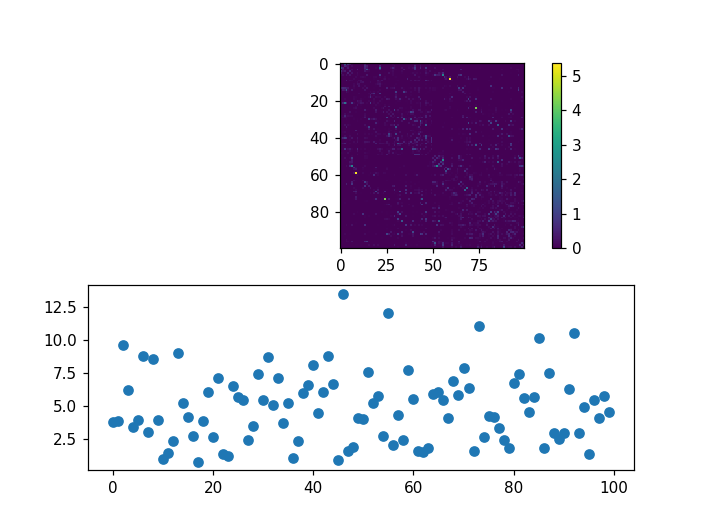

In [38]:
figure()
plt.subplot(2,1,1)
imshow(conn.weights); plt.colorbar()
plt.subplot(2,1,2)
degree = np.sum(conn.weights,axis=1)
plot(degree,'o')

And a short simulation

In [34]:
sim = simulator.Simulator(
    model=rww,
    connectivity=conn,
    coupling=coupling.Linear(a=5 / 50.0),
    integrator=integrators.EulerStochastic(dt=1, noise=noise.Additive(nsig=1e-5)), 
    monitors=monitors.TemporalAverage(period=1.),
    simulation_length=1e5
).configure()

(time, data), = sim.run()


<IPython.core.display.Javascript object>


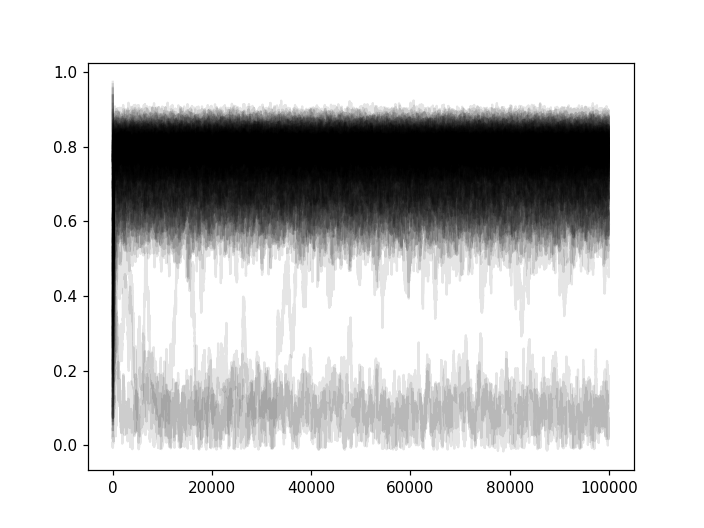

(100000, 1, 100, 1)

In [40]:
figure()
plot(time, data[:, 0, :, 0], 'k', alpha=0.1);
data.shape

<IPython.core.display.Javascript object>


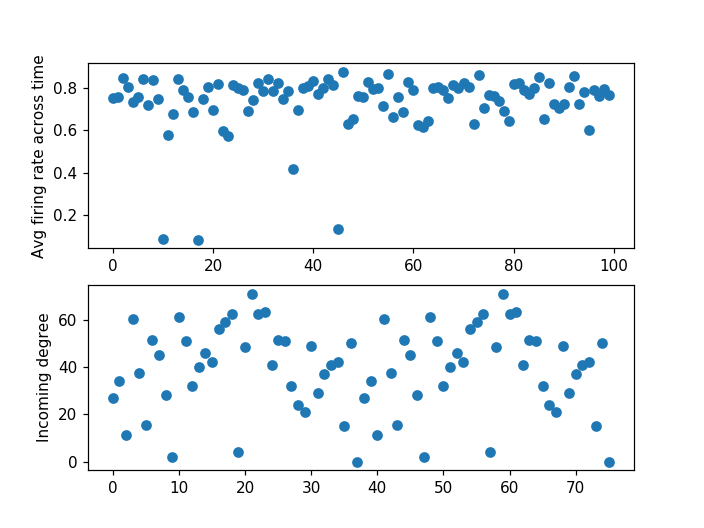

Text(0,0.5,u'Incoming degree')

In [47]:
Ts = data[:,0,:,0]
figure()
plt.subplot(211)
plt.plot(np.mean(Ts,axis=0),'o'); plt.ylabel('Avg firing rate across time')
plt.subplot(212)
plt.plot(np.sum(w,axis=1),'o');plt.ylabel('Incoming degree')

In [71]:
np.min(ts)


-0.016267465038257937

In [11]:
save_dir = '/nadata/cnl/data/yuchen/dCov_nonlinear/TVB_Simulations/ReducedWW/'

In [60]:
mdic = {'conn':conn.weights,'Ts':ts}
pydic = {'Simulator':sim}
savemat(save_dir+"default_run.mat", mdic)
# np.save(save_dir+'default_run', pydic) # need to figure out how to save python objects

In [56]:
pydic

{'simulator': Simulator(bound=False, value=None)}

WARNING  File 'hemispheres' not found in ZIP.


<IPython.core.display.Javascript object>


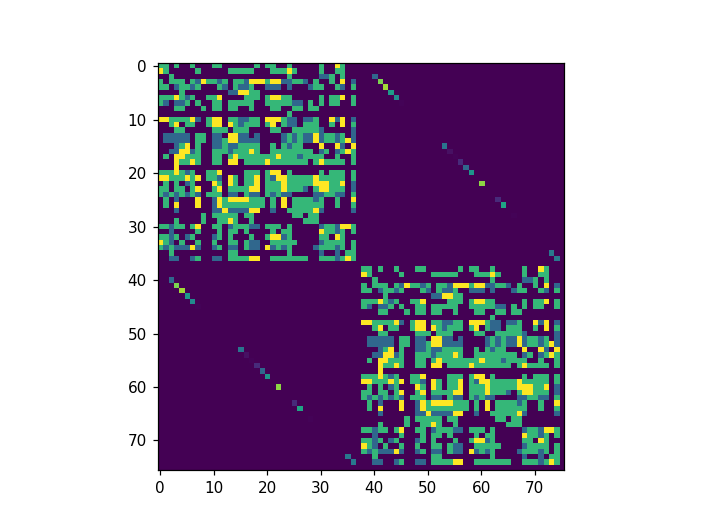

In [44]:
# Start a sparse simulation
conn = connectivity.Connectivity(load_default=True)

w_pre = np.copy(conn.weights)
w = conn.weights
# w[w<3] = 0 
# w[w<2] = 0
# conn.weights = w

plt.figure()
plt.colorbar
plt.imshow(w)


In [16]:
sim_sparse = simulator.Simulator(
    model=rww,
    connectivity=conn,
    coupling=coupling.Linear(a=2 / 50.0),
#     coupling=coupling.Linear(a=5 / 50.0),
#     coupling=coupling.Linear(a=0.5 / 50.0),
    integrator=integrators.EulerStochastic(dt=1, noise=noise.Additive(nsig=1e-5)), 
    monitors=monitors.TemporalAverage(period=1.),
    simulation_length=1e5
).configure()

(time, data), = sim_sparse.run()

# need to rescale coupling strength a s.t. every node is active 

<IPython.core.display.Javascript object>


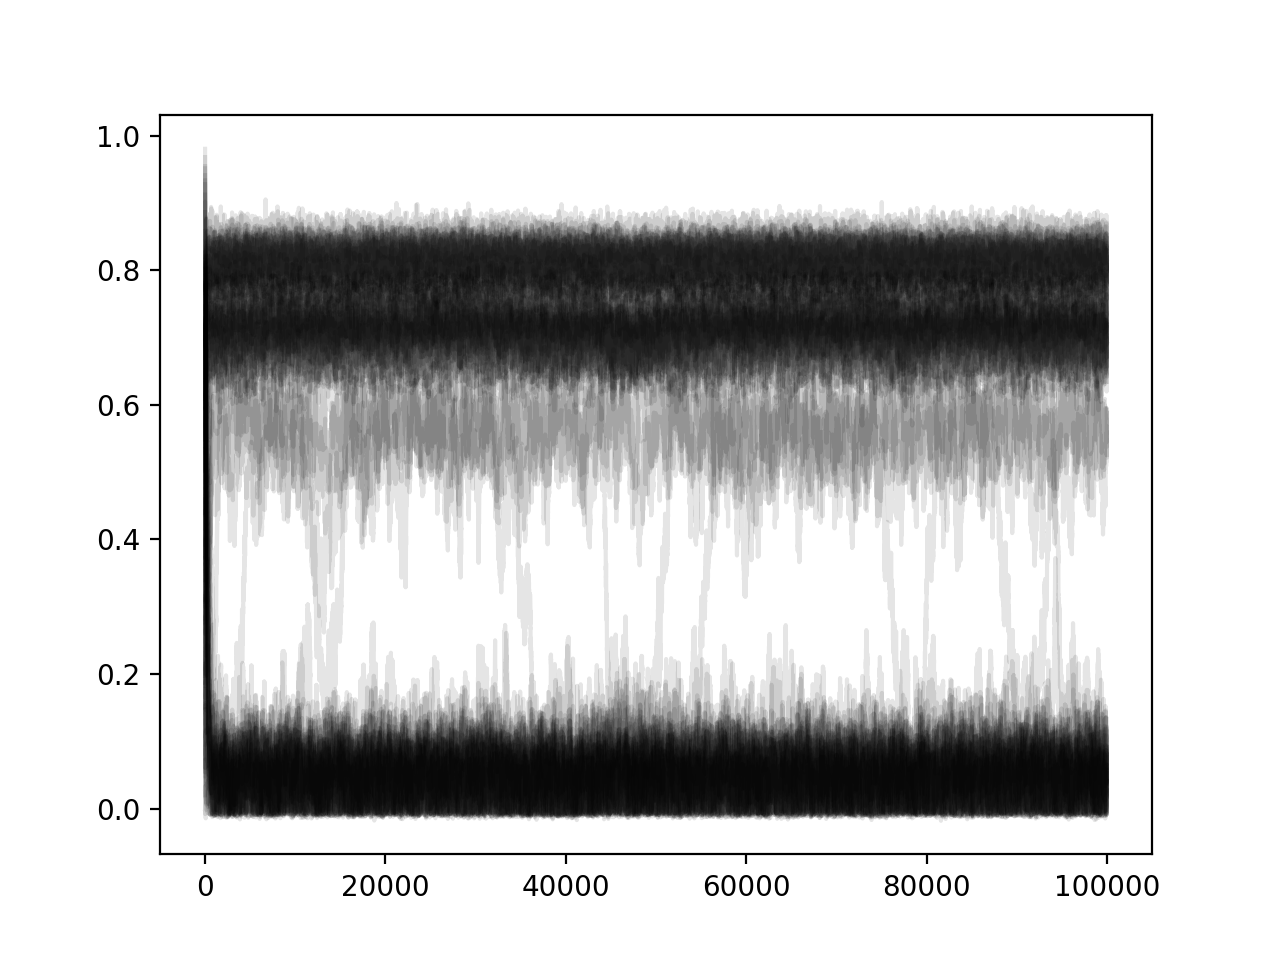

In [17]:
figure()
plot(time, data[:, 0, :, 0], 'k', alpha=0.1);

In [42]:
Ts = data[:,0,:,0]
figure()
plt.subplot(211)
hist(np.mean(Ts,axis=0))
plt.subplot(212)
plt.plot(np.sum(w,axis=1),'o');plt.ylabel('Incoming degree')

<IPython.core.display.Javascript object>

NameError: name 'w' is not defined

In [19]:
mdic = {'conn':sim_sparse.connectivity.weights,'Ts':data[:,0,:,0]}
# savemat(save_dir+"sparse_conn3.mat", mdic)
savemat(save_dir+"sparse_conn3_lowstrength.mat", mdic)
# savemat(save_dir+"sparse_conn23.mat", mdic)



In [18]:
unique(sim_sparse.connectivity.weights)

array([0.       , 2.       , 2.4073365, 2.4074291, 2.4879251, 2.4880117,
       2.5784751, 2.5785939, 3.       ])

# NKI DTI based SC simulation


In [5]:
file_dir = '/cnl/data/yuchen/fMRI_Real/NKI/struct_n_ts/A00073953-ses-ALGA/schaefer100_yeo17/'

In [6]:
conn_deter = connectivity.Connectivity.from_file(file_dir+'TVB_deter.zip')
conn_prob = connectivity.Connectivity.from_file(file_dir+'TVB_prob.zip')

WARNING  File 'hemispheres' not found in ZIP.
WARNING  File 'hemispheres' not found in ZIP.


<IPython.core.display.Javascript object>


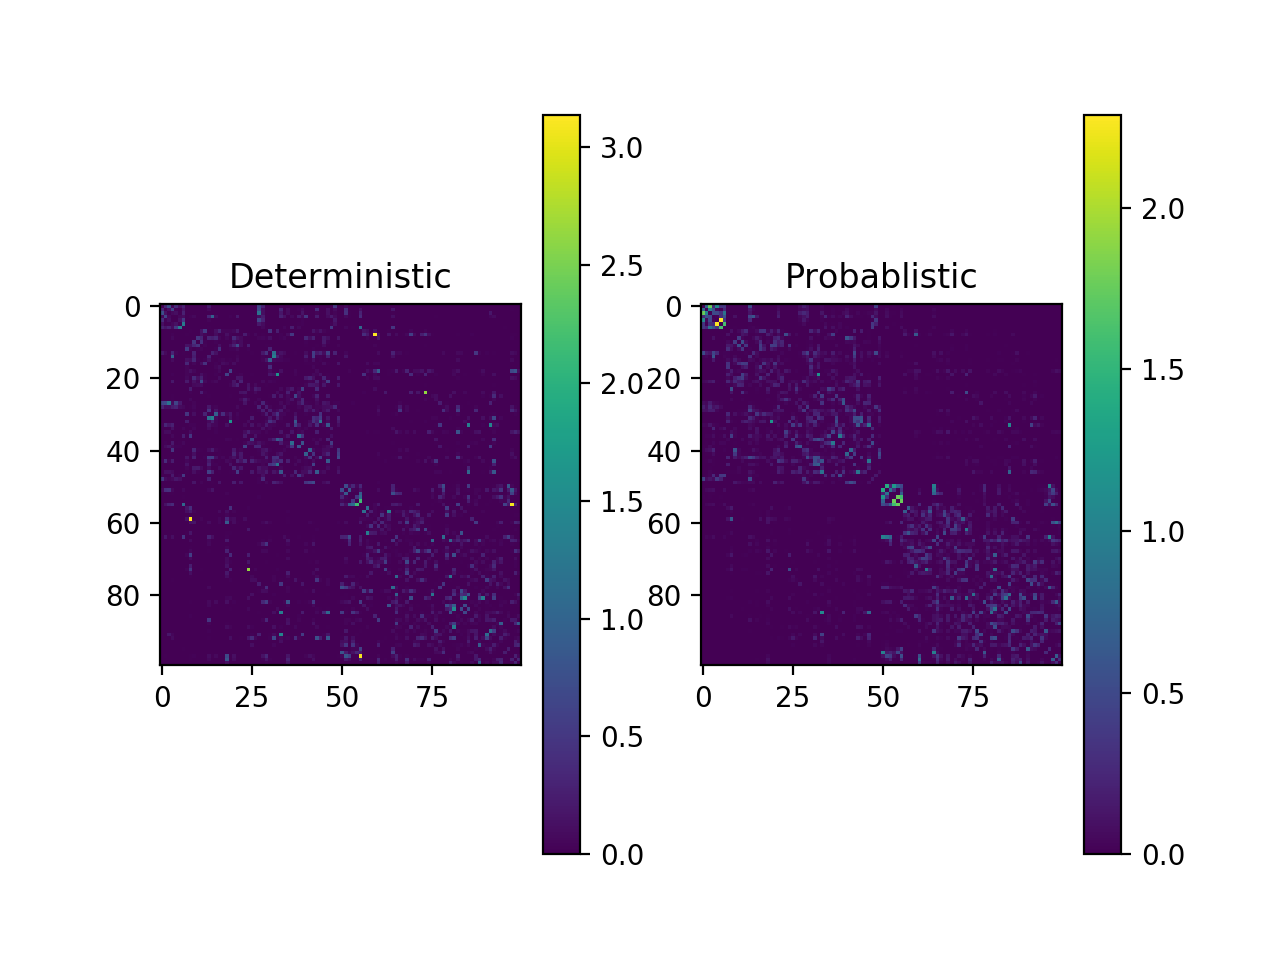

Text(0.5,1,u'Probablistic')

In [7]:
figure()
plt.subplot(1,2,1)
plt.imshow(conn_deter.weights); colorbar();plt.title('Deterministic')
plt.subplot(1,2,2)
plt.imshow(conn_prob.weights);colorbar();plt.title('Probablistic')

In [8]:
Tag = 'TVB_prob'
conn = connectivity.Connectivity.from_file(file_dir+Tag+'.zip')

WARNING  File 'hemispheres' not found in ZIP.


In [9]:
sim = simulator.Simulator(
    model=rww,
    connectivity=conn,
    coupling=coupling.Linear(a= 5/50.0),
    integrator=integrators.EulerStochastic(dt=1, noise=noise.Additive(nsig=1e-5)), 
    monitors=monitors.TemporalAverage(period=1.),
    simulation_length=1e5
).configure()

(time, data), = sim.run()

Ts = data[:,0,:,0]


<IPython.core.display.Javascript object>


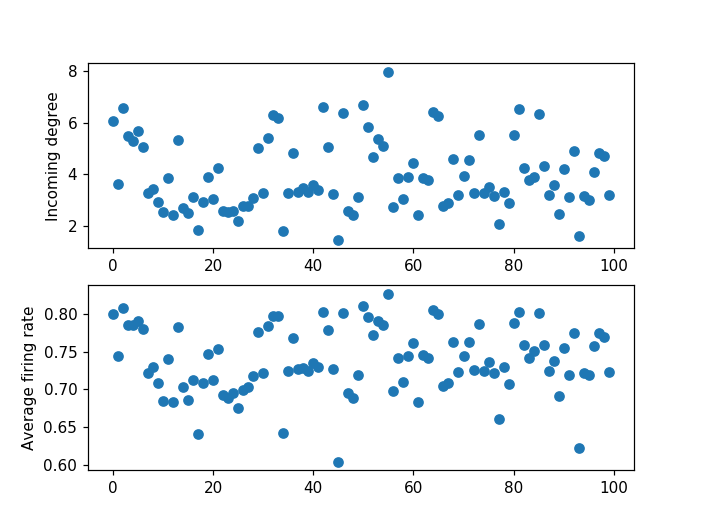

Text(0,0.5,u'Average firing rate')

In [103]:
figure()
plt.subplot(211)
plt.plot(np.sum(conn.weights,axis=1),'o');plt.ylabel('Incoming degree')
plt.subplot(212)
plt.plot(np.mean(Ts,axis=0),'o'); plt.ylabel('Average firing rate')

In [104]:
mdic = {'conn':conn.weights,'Ts':Ts}
# pydic = {'Simulator':sim}
savemat(file_dir+"Cp0.1.mat", mdic)
# savemat(file_dir+Tag+"Cp0.05.mat", mdic)

In [10]:
file_dir

'/cnl/data/yuchen/fMRI_Real/NKI/struct_n_ts/A00073953-ses-ALGA/schaefer100_yeo17/'

In [ ]:
# loop over all subjects
Cp = 5./50
subjects = glob("/cnl/data/yuchen/fMRI_Real/NKI/struct_n_ts/*/")
for s in np.arange(len(subjects)):
    file_dir = subjects[s]+'schaefer100_yeo17/'
    conn = connectivity.Connectivity.from_file(file_dir+Tag+'.zip')
    sim = simulator.Simulator(
    model=rww,
    connectivity=conn,
    coupling=coupling.Linear(a = Cp),
    integrator=integrators.EulerStochastic(dt=1, noise=noise.Additive(nsig=1e-5)), 
    monitors=monitors.TemporalAverage(period=1.),
    simulation_length=1e5
    ).configure()
    (time, data), = sim.run()
    Ts = data[:,0,:,0]
    mdic = {'conn':conn.weights,'Ts':Ts}
    pydic = {'Simulator':sim}
    savemat(file_dir+Tag+'Cp'+str(Cp)+'.mat', mdic)
    print('Finish subject %s',s)

    
    

WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 0)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 1)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 2)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 3)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 4)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 5)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 6)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 7)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 8)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 9)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 10)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 11)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 12)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 13)
WA

('Finish subject %s', 114)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 115)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 116)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 117)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 118)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 119)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 120)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 121)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 122)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 123)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 124)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 125)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 126)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 127)
WARNING  File 'hemispher

('Finish subject %s', 227)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 228)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 229)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 230)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 231)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 232)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 233)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 234)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 235)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 236)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 237)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 238)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 239)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 240)
WARNING  File 'hemispher

In [113]:
Cp = 5./50
str(Cp)

'0.1'

# A sparse simulation of NKI-DTI

In [21]:
Tag = 'TVB_deter'

WARNING  File 'hemispheres' not found in ZIP.


<IPython.core.display.Javascript object>


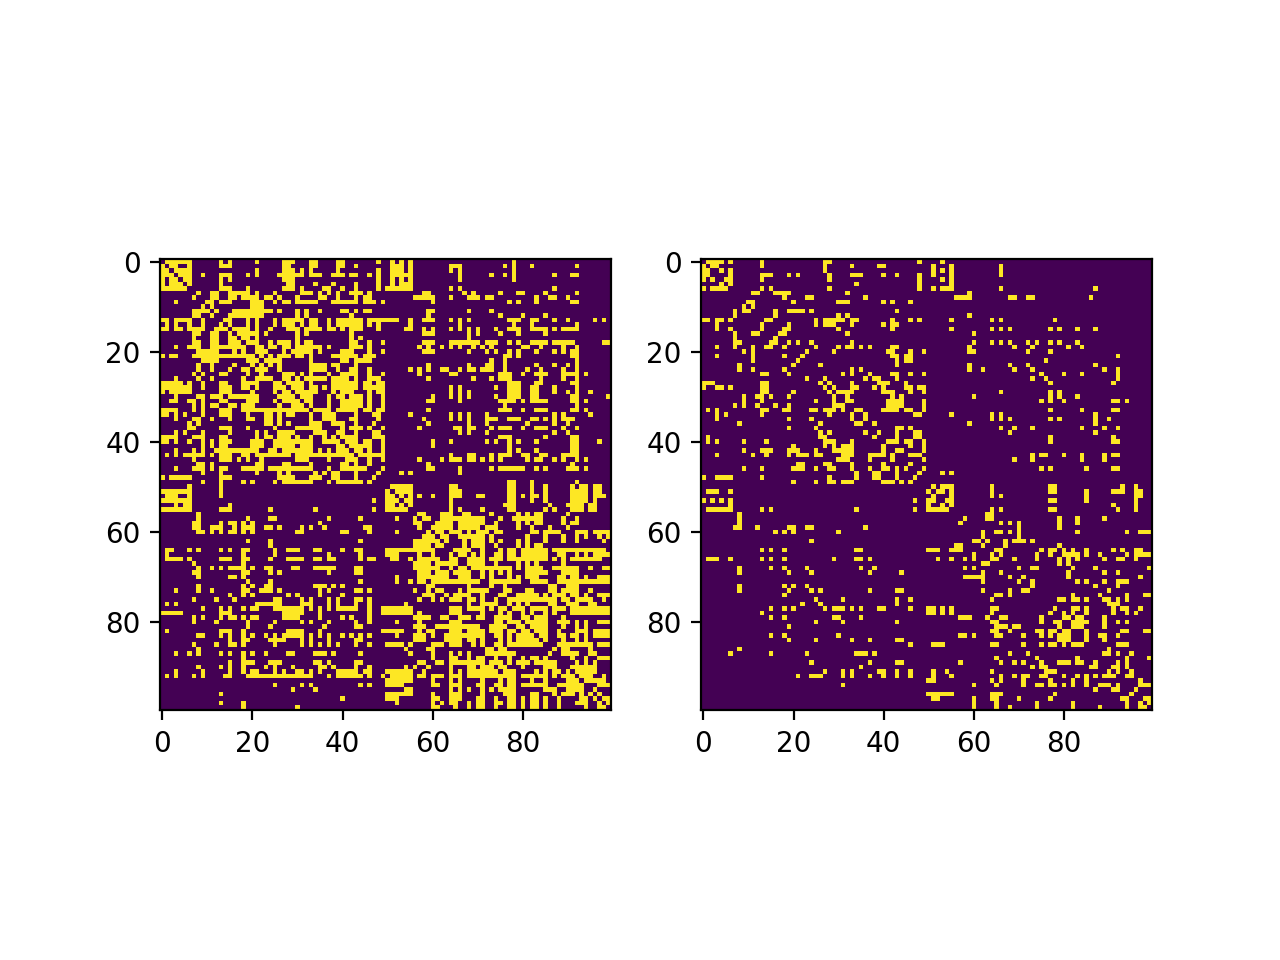

In [22]:
# Start a sparse simulation
subjects = glob("/cnl/data/yuchen/fMRI_Real/NKI/struct_n_ts/*/")
file_dir = subjects[1]+'schaefer100_yeo17/'
conn = connectivity.Connectivity.from_file(file_dir+Tag+'.zip')
w_pre = np.copy(conn.weights)
w = np.copy(w_pre)

w[w<0.05] = 0 # 15% sparsity 
conn.weights = w

plt.figure()
plt.subplot(1,2,1)
plt.imshow(double(w_pre!=0));
plt.subplot(1,2,2)
plt.imshow(double(w!=0))
# plt.colorbar()


<IPython.core.display.Javascript object>


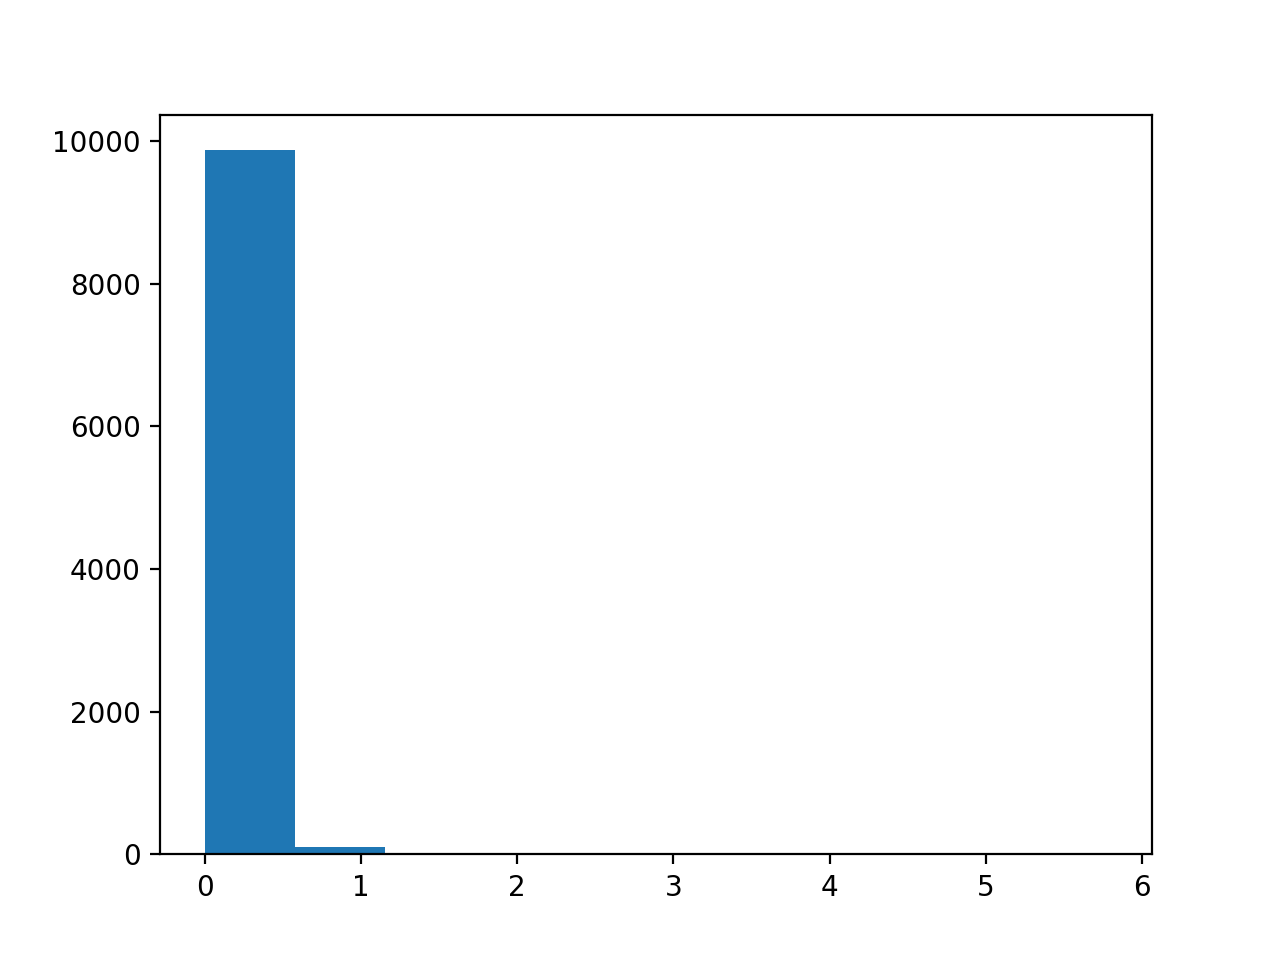

(array([9.868e+03, 1.060e+02, 1.000e+01, 8.000e+00, 2.000e+00, 0.000e+00,
        4.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([0.     , 0.57769, 1.15538, 1.73307, 2.31076, 2.88845, 3.46614,
        4.04383, 4.62152, 5.19921, 5.7769 ]),
 <a list of 10 Patch objects>)

In [23]:
figure()
plt.hist(w.flatten())

In [24]:
Cp = 5./50
sim_sparse = simulator.Simulator(
    model=rww,
    connectivity=conn,
    coupling=coupling.Linear(a=Cp),
    integrator=integrators.EulerStochastic(dt=1, noise=noise.Additive(nsig=1e-5)), 
    monitors=monitors.TemporalAverage(period=1.),
    simulation_length=1e5
).configure()

(time, data), = sim_sparse.run()

<IPython.core.display.Javascript object>


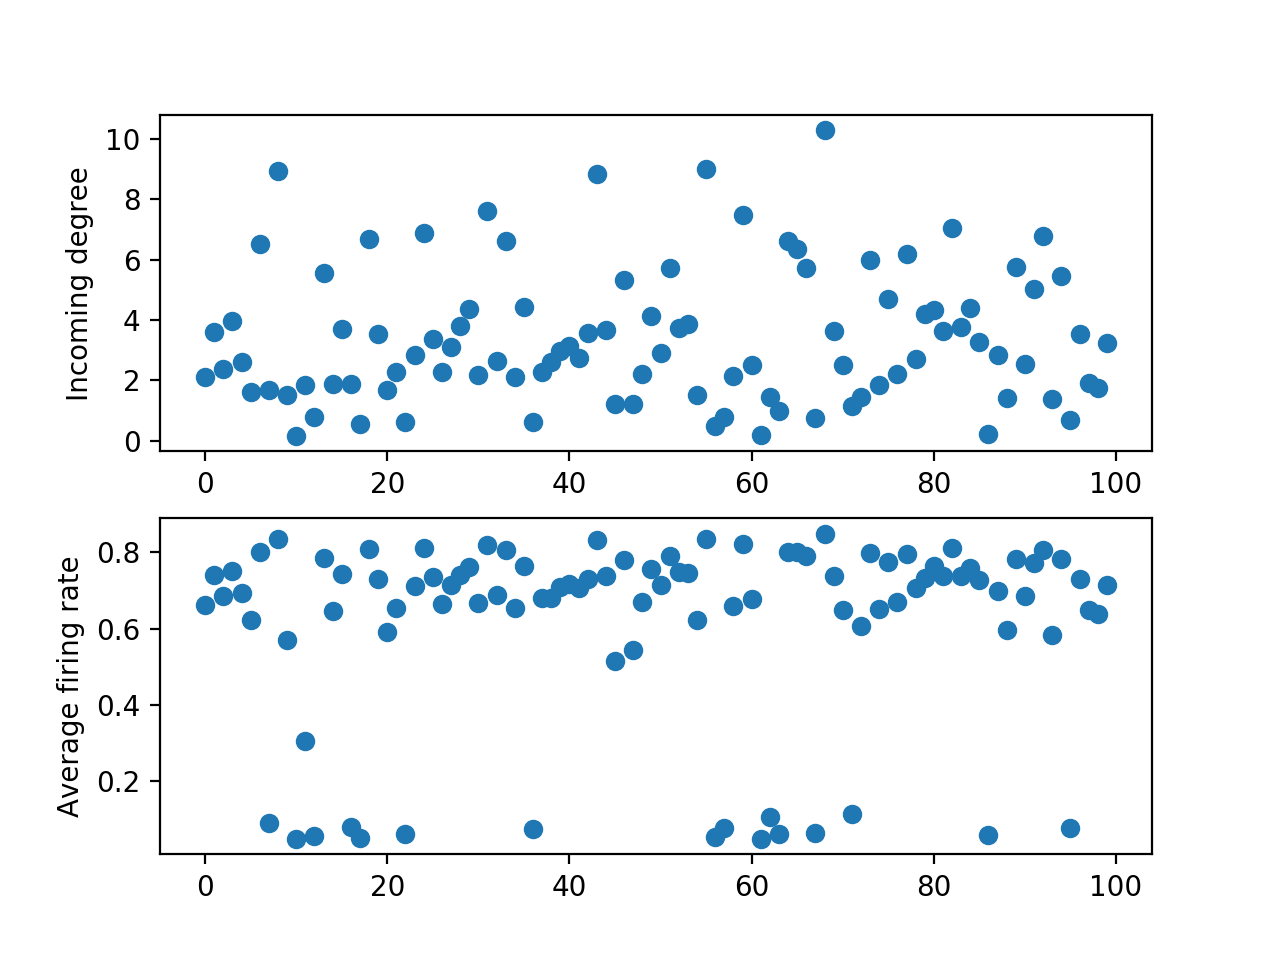

Text(0,0.5,u'Average firing rate')

In [25]:
Ts = data[:,0,:,0]
figure()
plt.subplot(211)
plt.plot(np.sum(conn.weights,axis=1),'o');plt.ylabel('Incoming degree')
plt.subplot(212)
plt.plot(np.mean(Ts,axis=0),'o'); plt.ylabel('Average firing rate')

<IPython.core.display.Javascript object>


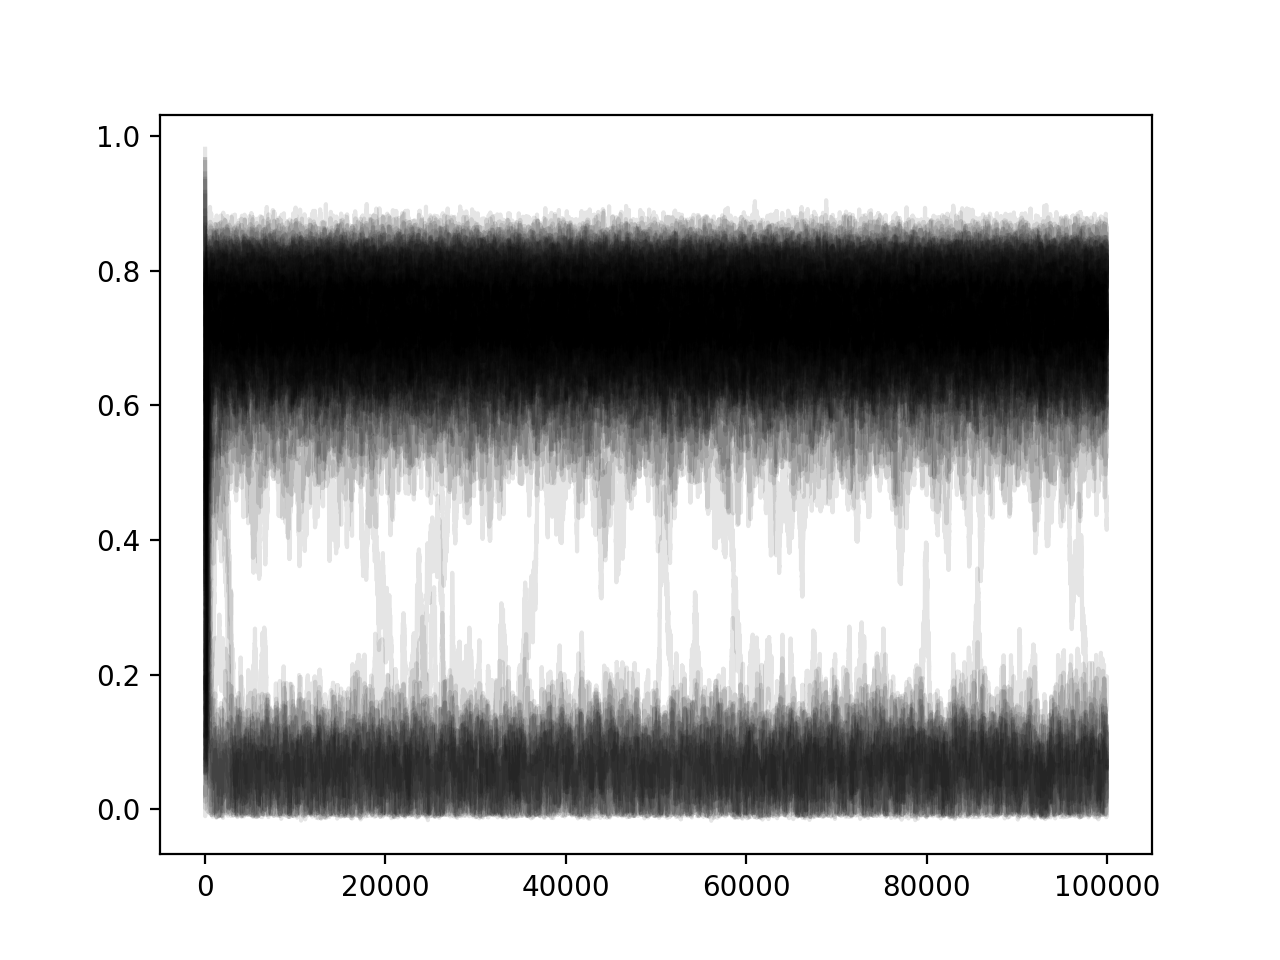

In [26]:
figure()
plot(time, Ts, 'k', alpha=0.1);

<IPython.core.display.Javascript object>


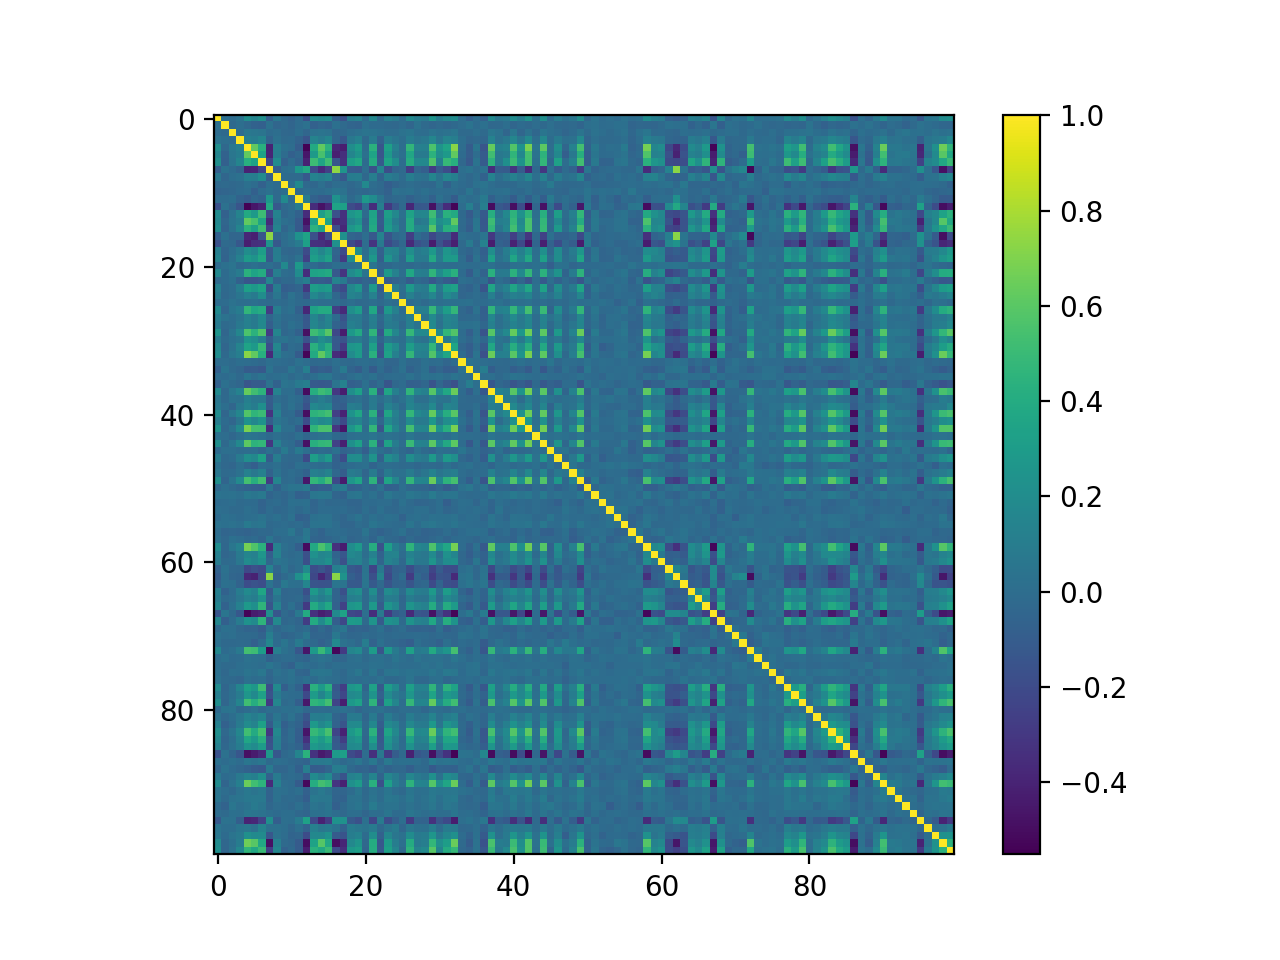

In [27]:
cor = np.corrcoef(Ts.T)
cor.shape
figure()
plt.imshow(np.corrcoef(Ts.T))
plt.colorbar()

In [174]:
sum(conn.weights!=0)

1316

In [ ]:

Cp = 5./50
subjects = glob("/cnl/data/yuchen/fMRI_Real/NKI/struct_n_ts/*/")
for s in np.arange(len(subjects)):
    file_dir = subjects[s]+'schaefer100_yeo17/'
    conn = connectivity.Connectivity.from_file(file_dir+Tag+'.zip')
    w_pre = np.copy(conn.weights)
    w = np.copy(w_pre)
    w[w<0.05] = 0 # around 15% sparsity for subject 0 
    conn.weights = w
    sim = simulator.Simulator(
    model=rww,
    connectivity=conn,
    coupling=coupling.Linear(a = Cp),
    integrator=integrators.EulerStochastic(dt=1, noise=noise.Additive(nsig=1e-5)), 
    monitors=monitors.TemporalAverage(period=1.),
    simulation_length=1e5
    ).configure()
    (time, data), = sim.run()
    Ts = data[:,0,:,0]
    mdic = {'conn':conn.weights,'Ts':Ts}
    pydic = {'Simulator':sim}
    savemat(file_dir+Tag+'Cp'+str(Cp)+'_Sparsity15.mat', mdic)
    print('Finish subject %s',s)



WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 0)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 1)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 2)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 3)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 4)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 5)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 6)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 7)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 8)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 9)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 10)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 11)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 12)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 13)
WA

('Finish subject %s', 114)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 115)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 116)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 117)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 118)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 119)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 120)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 121)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 122)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 123)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 124)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 125)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 126)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 127)
WARNING  File 'hemispher

('Finish subject %s', 227)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 228)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 229)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 230)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 231)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 232)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 233)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 234)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 235)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 236)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 237)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 238)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 239)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 240)
WARNING  File 'hemispher

('Finish subject %s', 340)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 341)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 342)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 343)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 344)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 345)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 346)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 347)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 348)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 349)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 350)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 351)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 352)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 353)
WARNING  File 'hemispher

('Finish subject %s', 453)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 454)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 455)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 456)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 457)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 458)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 459)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 460)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 461)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 462)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 463)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 464)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 465)
WARNING  File 'hemispheres' not found in ZIP.
('Finish subject %s', 466)
WARNING  File 'hemispher

NameError: name 'figure' is not defined

## References

[DPA_2013]     Deco Gustavo, Ponce Alvarez Adrian, Dante Mantini, Gian Luca Romani, Patric Hagmann and Maurizio Corbetta. Resting-State Functional Connectivity Emerges from Structurally and Dynamically Shaped Slow Linear Fluctuations. The Journal of Neuroscience 32(27), 11239-11252, 2013.